# Content-Based Music Recommendation System

Objective: Recommend songs to users based on their musical preferences and the features of the songs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Data Acquisition:

get the data here: https://www.kaggle.com/datasets/nikitatkachenko/19332-spotify-songs

In [2]:
df = pd.read_csv('19332_Spotify_Songs.csv', encoding='latin-1')
df.head()

C:\Users\migue\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


id                                            artists  \
0  000xQL6tZNLJzIrtIgxqSl  https://api.spotify.com/v1/artists/5ZsFI1h6hId...   
1  001UkMQHw4zXfFNdKpwXAF  https://api.spotify.com/v1/artists/0XKOBt59crn...   
2  003FTlCpBTM4eSqYSWPv4H  https://api.spotify.com/v1/artists/3vAaWhdBR38...   
3  003vvx7Niy0yvhvHt4a68B  https://api.spotify.com/v1/artists/0C0XlULifJt...   
4  005lwxGU1tms6HGELIcUv9  https://api.spotify.com/v1/artists/6jJ0s89eD6G...   

                                   available_markets  disc_number  \
0  AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...            1   
1  AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...            1   
2  AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...            1   
3  AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...            1   
4                                         CA, JP, US            1   

  duration_ms.x explicit                                               href  \
0        188490    FALSE  https://api.spotify.com/v1/tracks/000xQL6tZNLJ...   
1        191053    FALSE  https://api.spotify.com/v1/tracks/001UkMQHw4zX...   
2        233266    FALSE  https://api.spotify.com/v1/tracks/003FTlCpBTM4...   
3        222973    FALSE  https://api.spotify.com/v1/tracks/003vvx7Niy0y...   
4        179640    FALSE  https://api.spotify.com/v1/tracks/005lwxGU1tms...   

  is_local                                  name popularity  ...  \
0    FALSE  Still Got Time (feat. PARTYNEXTDOOR)         63  ...   
1    FALSE       Brand New Man - with Luke Combs         68  ...   
2    FALSE                          Swing, Swing         67  ...   
3    FALSE                        Mr. Brightside         80  ...   
4    FALSE                       I Kissed A Girl         68  ...   

  instrumentalness liveness valence    tempo          type.y  \
0         0.000000   0.0852   0.524  120.963  audio_features   
1         0.000079   0.2900   0.562  127.061  audio_features   
2         0.128000   0.0385   0.318  127.947  audio_features   
3         0.000000   0.0995   0.236  148.033  audio_features   
4         0.000000   0.1320   0.696  129.996  audio_features   

                                  uri.y  \
0  spotify:track:000xQL6tZNLJzIrtIgxqSl   
1  spotify:track:001UkMQHw4zXfFNdKpwXAF   
2  spotify:track:003FTlCpBTM4eSqYSWPv4H   
3  spotify:track:003vvx7Niy0yvhvHt4a68B   
4  spotify:track:005lwxGU1tms6HGELIcUv9   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/000xQL6tZNLJ...   
1  https://api.spotify.com/v1/tracks/001UkMQHw4zX...   
2  https://api.spotify.com/v1/tracks/003FTlCpBTM4...   
3  https://api.spotify.com/v1/tracks/003vvx7Niy0y...   
4  https://api.spotify.com/v1/tracks/005lwxGU1tms...   

                                        analysis_url duration_ms.y  \
0  https://api.spotify.com/v1/audio-analysis/000x...      188491.0   
1  https://api.spotify.com/v1/audio-analysis/001U...      191053.0   
2  https://api.spotify.com/v1/audio-analysis/003F...      233267.0   
3  https://api.spotify.com/v1/audio-analysis/003v...      222973.0   
4  https://api.spotify.com/v1/audio-analysis/005l...      179640.0   

  time_signature  
0            4.0  
1            4.0  
2            4.0  
3            4.0  
4            4.0  

[5 rows x 46 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19335 entries, 0 to 19334
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            19333 non-null  object 
 1   artists                       19335 non-null  object 
 2   available_markets             19335 non-null  object 
 3   disc_number                   19335 non-null  int64  
 4   duration_ms.x                 19335 non-null  object 
 5   explicit                      19335 non-null  object 
 6   href                          19335 non-null  object 
 7   is_local                      19335 non-null  object 
 8   name                          19333 non-null  object 
 9   popularity                    19334 non-null  object 
 10  preview_url                   11811 non-null  object 
 11  track_number                  19334 non-null  object 
 12  type.x                        19334 non-null  object 
 13  u

In [4]:
df['album.release_date']

0        2017-03-23
1        2019-04-05
2        2002-10-15
3              2004
4        2008-06-17
            ...    
19330    2016-12-02
19331    2018-11-02
19332    2017-02-24
19333    2020-07-10
19334    2020-06-12
Name: album.release_date, Length: 19335, dtype: object

In [5]:
df['mode'].value_counts()

1.0    12472
0.0     6856
Name: mode, dtype: int64

#### Data Preprocessing:

In [6]:
#Clean and preprocess the data, handling missing values and removing irrelevant features.
df.columns

Index(['id', 'artists', 'available_markets', 'disc_number', 'duration_ms.x',
       'explicit', 'href', 'is_local', 'name', 'popularity', 'preview_url',
       'track_number', 'type.x', 'uri.x', 'album.album_type', 'album.artists',
       'album.available_markets', 'album.href', 'album.id', 'album.images',
       'album.name', 'album.release_date', 'album.release_date_precision',
       'album.total_tracks', 'album.type', 'album.uri',
       'album.external_urls.spotify', 'external_ids.isrc',
       'external_urls.spotify', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type.y', 'uri.y', 'track_href', 'analysis_url',
       'duration_ms.y', 'time_signature'],
      dtype='object')

In [7]:
#selecting which features are the ones I need to reccomend the next song:
columns_drop = ['id', 'artists', 'available_markets', 'explicit', 'href', 'is_local', 'preview_url', 'track_number', 
               'type.x', 'uri.x', 'album.album_type', 'album.release_date', 'album.artists', 'album.available_markets', 'album.href', 'album.id', 
               'album.images', 'album.name', 'album.release_date_precision', 'album.total_tracks', 
               'album.type', 'album.uri', 'album.external_urls.spotify', 'external_ids.isrc', 'external_urls.spotify', 
               'type.y', 'uri.y', 'track_href', 'analysis_url','duration_ms.y', 'time_signature', 'disc_number', 
                'duration_ms.x']

df.drop(columns_drop, axis=1, inplace=True)

In [8]:
#set the name column as index
#df = df.set_index(['name'])

In [9]:
df.head()

name popularity  danceability  energy  key  \
0  Still Got Time (feat. PARTYNEXTDOOR)         63         0.748   0.627  7.0   
1       Brand New Man - with Luke Combs         68         0.573   0.846  7.0   
2                          Swing, Swing         67         0.553   0.717  7.0   
3                        Mr. Brightside         80         0.352   0.911  1.0   
4                       I Kissed A Girl         68         0.699   0.760  5.0   

   loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    -6.029   1.0       0.0639      0.131000          0.000000    0.0852   
1    -4.866   1.0       0.0344      0.003720          0.000079    0.2900   
2    -5.857   1.0       0.0318      0.000065          0.128000    0.0385   
3    -5.230   1.0       0.0747      0.001210          0.000000    0.0995   
4    -3.173   1.0       0.0677      0.002230          0.000000    0.1320   

   valence    tempo  
0    0.524  120.963  
1    0.562  127.061  
2    0.318  127.947  
3    0.236  148.033  
4    0.696  129.996

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19335 entries, 0 to 19334
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              19333 non-null  object 
 1   popularity        19334 non-null  object 
 2   danceability      19328 non-null  float64
 3   energy            19328 non-null  float64
 4   key               19328 non-null  float64
 5   loudness          19328 non-null  float64
 6   mode              19328 non-null  float64
 7   speechiness       19328 non-null  float64
 8   acousticness      19328 non-null  float64
 9   instrumentalness  19328 non-null  float64
 10  liveness          19328 non-null  float64
 11  valence           19328 non-null  float64
 12  tempo             19328 non-null  float64
dtypes: float64(11), object(2)
memory usage: 1.9+ MB


In [11]:
df.describe()

danceability        energy           key      loudness          mode  \
count  19328.000000  19328.000000  19328.000000  19328.000000  19328.000000   
mean       0.615997      0.584217      5.191743     -8.605355      0.645281   
std        0.179863      0.236897      3.568570      5.803552      0.478440   
min        0.000000      0.000020      0.000000    -54.376000      0.000000   
25%        0.507000      0.443000      2.000000     -9.714000      0.000000   
50%        0.638000      0.620000      5.000000     -6.816000      1.000000   
75%        0.748000      0.765000      8.000000     -5.085000      1.000000   
max        0.985000      1.000000     11.000000      1.060000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  19328.000000  19328.000000      19328.000000  19328.000000   
mean       0.107343      0.308663          0.102164      0.182456   
std        0.111756      0.321930          0.266955      0.147103   
min        0.000000      0.000000          0.000000      0.000000   
25%        0.038200      0.039500          0.000000      0.096700   
50%        0.056500      0.175000          0.000002      0.122000   
75%        0.127000      0.517000          0.001130      0.219000   
max        0.954000      0.996000          1.000000      0.993000   

            valence         tempo  
count  19328.000000  19328.000000  
mean       0.491398    119.794873  
std        0.242762     30.972588  
min        0.000000      0.000000  
25%        0.304000     94.986750  
50%        0.490000    119.894500  
75%        0.678000    140.068000  
max        1.000000    230.401000

<AxesSubplot:>

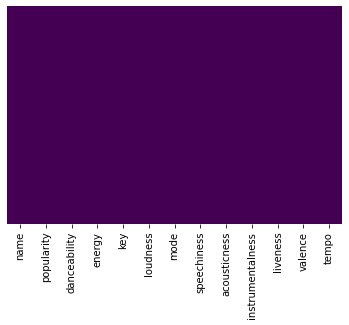

In [12]:
# Create a boolean DataFrame of the same shape as the original DataFrame, with True values where the original 
#DataFrame contains missing values
missing_values = df.isnull()

# Show the rows with missing values on a heatmap
sns.heatmap(missing_values, cmap='viridis', cbar=False, yticklabels=False)

In [13]:
#only the rows with missing values
rows_with_missing_values = df[df.isnull().any(axis=1)]
rows_with_missing_values

name  \
7398                                  Touch You - ç¾å   
7399   https://open.spotify.com/track/30HkrVoeCMeAWpB...   
12598                                                 ª}   
12599  AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...   
12600  https://open.spotify.com/track/56wVfJKtnwlSZtC...   
12968                                                NaN   
14464                                                NaN   
16650                                          Touch You   
16651  https://open.spotify.com/track/6qWEpnyU43Bcrx3...   

                                              popularity  danceability  \
7398                                                  61           NaN   
7399                                               0.638           NaN   
12598                                                NaN           NaN   
12599  https://api.spotify.com/v1/albums/1aNkIWX1Uz0m...           NaN   
12600                                              0.512           NaN   
12968                                                 58         0.605   
14464                                                 57         0.290   
16650                                               77.0           NaN   
16651                                              0.603           NaN   

       energy  key  loudness  mode  speechiness  acousticness  \
7398      NaN  NaN       NaN   NaN          NaN           NaN   
7399      NaN  NaN       NaN   NaN          NaN           NaN   
12598     NaN  NaN       NaN   NaN          NaN           NaN   
12599     NaN  NaN       NaN   NaN          NaN           NaN   
12600     NaN  NaN       NaN   NaN          NaN           NaN   
12968   0.916  1.0    -1.539   1.0       0.0747        0.0485   
14464   0.482  6.0    -8.207   0.0       0.0350        0.1450   
16650     NaN  NaN       NaN   NaN          NaN           NaN   
16651     NaN  NaN       NaN   NaN          NaN           NaN   

       instrumentalness  liveness  valence    tempo  
7398                NaN       NaN      NaN      NaN  
7399                NaN       NaN      NaN      NaN  
12598               NaN       NaN      NaN      NaN  
12599               NaN       NaN      NaN      NaN  
12600               NaN       NaN      NaN      NaN  
12968          0.000000     0.158    0.632  150.114  
14464          0.000171     0.120    0.247  141.459  
16650               NaN       NaN      NaN      NaN  
16651               NaN       NaN      NaN      NaN

In [14]:
len(rows_with_missing_values)

9

In [15]:
len(df)

19335

In [16]:
#9 rows with missing values is nothing compared to the dimmension of the df. so we dropt them or input the mean value.
# Fill in missing values with the mean of the corresponding column
#df.fillna(df.mean(), inplace=True)
#or
# Drop the rows with missing values
df = df.dropna(how='any')
#len(df)

In [17]:
#scale all features.
from sklearn.preprocessing import StandardScaler

In [18]:
# Extract the 'name' column and drop it from the DataFrame
names = df['name']
df.drop('name', axis=1, inplace=True)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the DataFrame
scaled_df = scaler.fit_transform(df)

# Convert the NumPy array back to a DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

# Concatenate the 'name' column back to the DataFrame
scaled_df.insert(0, 'name', names)

In [19]:
# Print the resulting DataFrame with scaled values
scaled_df

name  popularity  \
0                   Still Got Time (feat. PARTYNEXTDOOR)    0.243995   
1                        Brand New Man - with Luke Combs    0.495194   
2                                           Swing, Swing    0.444955   
3                                         Mr. Brightside    1.098072   
4                                        I Kissed A Girl    0.495194   
...                                                  ...         ...   
19321                                             Unrung    0.796633   
19322                                           December    0.444955   
19323  Edge of Great (feat. Madison Reyes, Charlie Gi...    0.595674   
19324  Poor Unfortunate Souls - From "The Little Merm...   -0.911520   
19325                                         Cold Water   -0.107683   

       danceability    energy       key  loudness      mode  speechiness  \
0          0.733854  0.180652  0.506674  0.443999  0.741401    -0.388772   
1         -0.239166  1.105132  0.506674  0.644396  0.741401    -0.652738   
2         -0.350368  0.560575  0.506674  0.473637  0.741401    -0.676002   
3         -1.467951  1.379521 -1.174690  0.581675  0.741401    -0.292134   
4          0.461408  0.742094 -0.053781  0.936118  0.741401    -0.354770   
...             ...       ...       ...       ...       ...          ...   
19321     -0.022322  0.906728  1.347356  0.689714  0.741401    -0.714479   
19322     -0.361489  1.252880  0.506674  0.431938 -1.348798    -0.475568   
19323      0.711614  0.552132 -1.454918  0.431248  0.741401     2.180190   
19324      0.200083 -0.034638  0.506674  0.256009  0.741401    -0.681371   
19325      1.128622 -0.828255  1.067129  0.380761  0.741401    -0.233973   

       acousticness  instrumentalness  liveness   valence     tempo  
0         -0.551935         -0.382734 -0.661157  0.134276  0.037802  
1         -0.947300         -0.382439  0.731038  0.290809  0.234688  
2         -0.958654          0.096739 -0.978616 -0.714301  0.263294  
3         -0.955097         -0.382734 -0.563948 -1.052084  0.911811  
4         -0.951928         -0.382734 -0.343019  0.842796  0.329451  
...             ...               ...       ...       ...       ...  
19321     -0.930961         -0.382734 -0.071106  0.805722  0.199657  
19322     -0.381091         -0.086434 -0.207062 -0.430069 -1.025311  
19323     -0.645123         -0.382734 -0.615612 -0.623676  1.135527  
19324     -0.104633         -0.382734  0.404742 -0.079928 -1.414241  
19325     -0.464960         -0.043357 -0.499369 -1.031488 -0.800981  

[19326 rows x 13 columns]

Add the first column of df to scaled_df to have the names on the df

scaled_df = pd.concat([df.iloc[:, 0], scaled_df], axis=1)

scaled_df

df.iloc[:, 0] is a Pandas indexing operation that selects a subset of a DataFrame based on the integer position of the rows and columns. The first part df.iloc[:, :] selects all rows and all columns of the DataFrame df. The colon : is a slice notation that means "all".

The second part 0 specifies the integer position of the column to select. Since it's the first column, its position is 0. So, df.iloc[:, 0] selects all rows of the first column of the DataFrame df, and returns a Pandas Series object.

In [20]:
#only the rows with missing values
rows_with_missing_values = scaled_df[scaled_df.isnull().any(axis=1)]
rows_with_missing_values

name  popularity  danceability    energy       key  loudness      mode  \
7398   NaN    0.495194      0.250124  0.699880  0.506674  0.535669  0.741401   
7399   NaN   -0.157923      0.717174  0.493033 -1.454918  0.540666  0.741401   
12598  NaN    0.394715      0.372447  0.336843 -0.053781  0.753469 -1.348798   
12599  NaN   -2.870871      0.478089  1.252880 -1.454918  0.498622  0.741401   
12600  NaN   -2.067035     -0.995342 -2.284628 -0.053781 -1.971448  0.741401   
12968  NaN    0.294235      0.756094 -1.144858 -1.454918 -1.917860  0.741401   
14464  NaN    0.294235     -0.672855  1.307758 -0.894463  0.653357 -1.348798   
16650  NaN    0.595674     -0.100163 -0.131729  1.067129  0.321142 -1.348798   
16651  NaN   -2.870871     -2.257488 -1.554331  1.067129 -0.627772  0.741401   

       speechiness  acousticness  instrumentalness  liveness   valence  \
7398     -0.679581     -0.864736         -0.382239 -0.663196  1.386544   
7399     -0.689424     -0.483597         -0.382734 -0.091499  1.897338   
12598    -0.663475      0.712313         -0.382734 -0.784198  1.543078   
12599     0.041625     -0.942734         -0.382734 -0.820906  0.752171   
12600    -0.539993      1.942393          2.411695 -0.424593 -0.475381   
12968     2.743912     -0.536404         -0.382734 -0.431390  0.093083   
14464    -0.565942     -0.944784         -0.380501 -0.540156 -1.146828   
16650    -0.605313      0.786864          0.205370  0.506710  0.171349   
16651    -0.621420      1.964137         -0.382442  0.404742 -1.480492   

          tempo  
7398   0.332066  
7399   0.167951  
12598 -0.413312  
12599  0.070380  
12600 -1.302850  
12968  0.911843  
14464  0.201400  
16650  0.105992  
16651 -1.502449

In [21]:
len(rows_with_missing_values)

9

In [22]:
# Drop the rows with missing values
scaled_df = scaled_df.dropna(how='any')
len(scaled_df)

19317

In [23]:
#How many uniques songs are in the df?
scaled_df['name'].nunique()

16218

In [24]:
#this creates a dilema, because there are some songs with multiple entries in the data frame
scaled_df['name'].value_counts()

A Ella                                                                                                                             23
Traicionera                                                                                                                        21
Que Raro                                                                                                                           17
Hello                                                                                                                              14
Lumbra - Correct Version                                                                                                           14
                                                                                                                                   ..
Let the Games Begin                                                                                                                 1
Whine Up                                                      

In [25]:
#one option is just to keep the song with higher popularity.

# Get the count of each name
name_counts = scaled_df['name'].value_counts()
# Get the names with count greater than 1
filtered_names = name_counts[name_counts > 1].index.tolist()
# Create a list to store the filtered rows
filtered_rows = []

# Loop over each filtered name and keep the row with the highest 'popularity' value
for name in filtered_names:
    name_df = scaled_df[scaled_df['name'] == name]
    max_popularity_row = name_df[name_df['popularity'] == name_df['popularity'].max()]
    filtered_rows.append(max_popularity_row)

# Drop the rows with filtered names from scaled_df
scaled_df = scaled_df[~scaled_df['name'].isin(filtered_names)]

# Concatenate the filtered rows with scaled_df
filtered_df = pd.concat(filtered_rows)
scaled_df = pd.concat([scaled_df, filtered_df]).reset_index(drop=True)

In [26]:
# check the len of filtered DataFrame
len(filtered_df)

1984

In [27]:
#and now my data frame matches the lenght of unique values on the col name :)
len(scaled_df)

16271

In [28]:
scaled_df.head()

name  popularity  danceability    energy  \
0  Still Got Time (feat. PARTYNEXTDOOR)    0.243995      0.733854  0.180652   
1       Brand New Man - with Luke Combs    0.495194     -0.239166  1.105132   
2                          Swing, Swing    0.444955     -0.350368  0.560575   
3                       I Kissed A Girl    0.495194      0.461408  0.742094   
4                      Hasta Que un dÃ­   -0.007203      0.378007 -0.085294   

        key  loudness      mode  speechiness  acousticness  instrumentalness  \
0  0.506674  0.443999  0.741401    -0.388772     -0.551935         -0.382734   
1  0.506674  0.644396  0.741401    -0.652738     -0.947300         -0.382439   
2  0.506674  0.473637  0.741401    -0.676002     -0.958654          0.096739   
3 -0.053781  0.936118  0.741401    -0.354770     -0.951928         -0.382734   
4  1.347356  0.302188  0.741401    -0.694793      0.361306         -0.382734   

   liveness   valence     tempo  
0 -0.661157  0.134276  0.037802  
1  0.731038  0.290809  0.234688  
2 -0.978616 -0.714301  0.263294  
3 -0.343019  0.842796  0.329451  
4 -0.207062 -0.508336  0.489659

### EDA

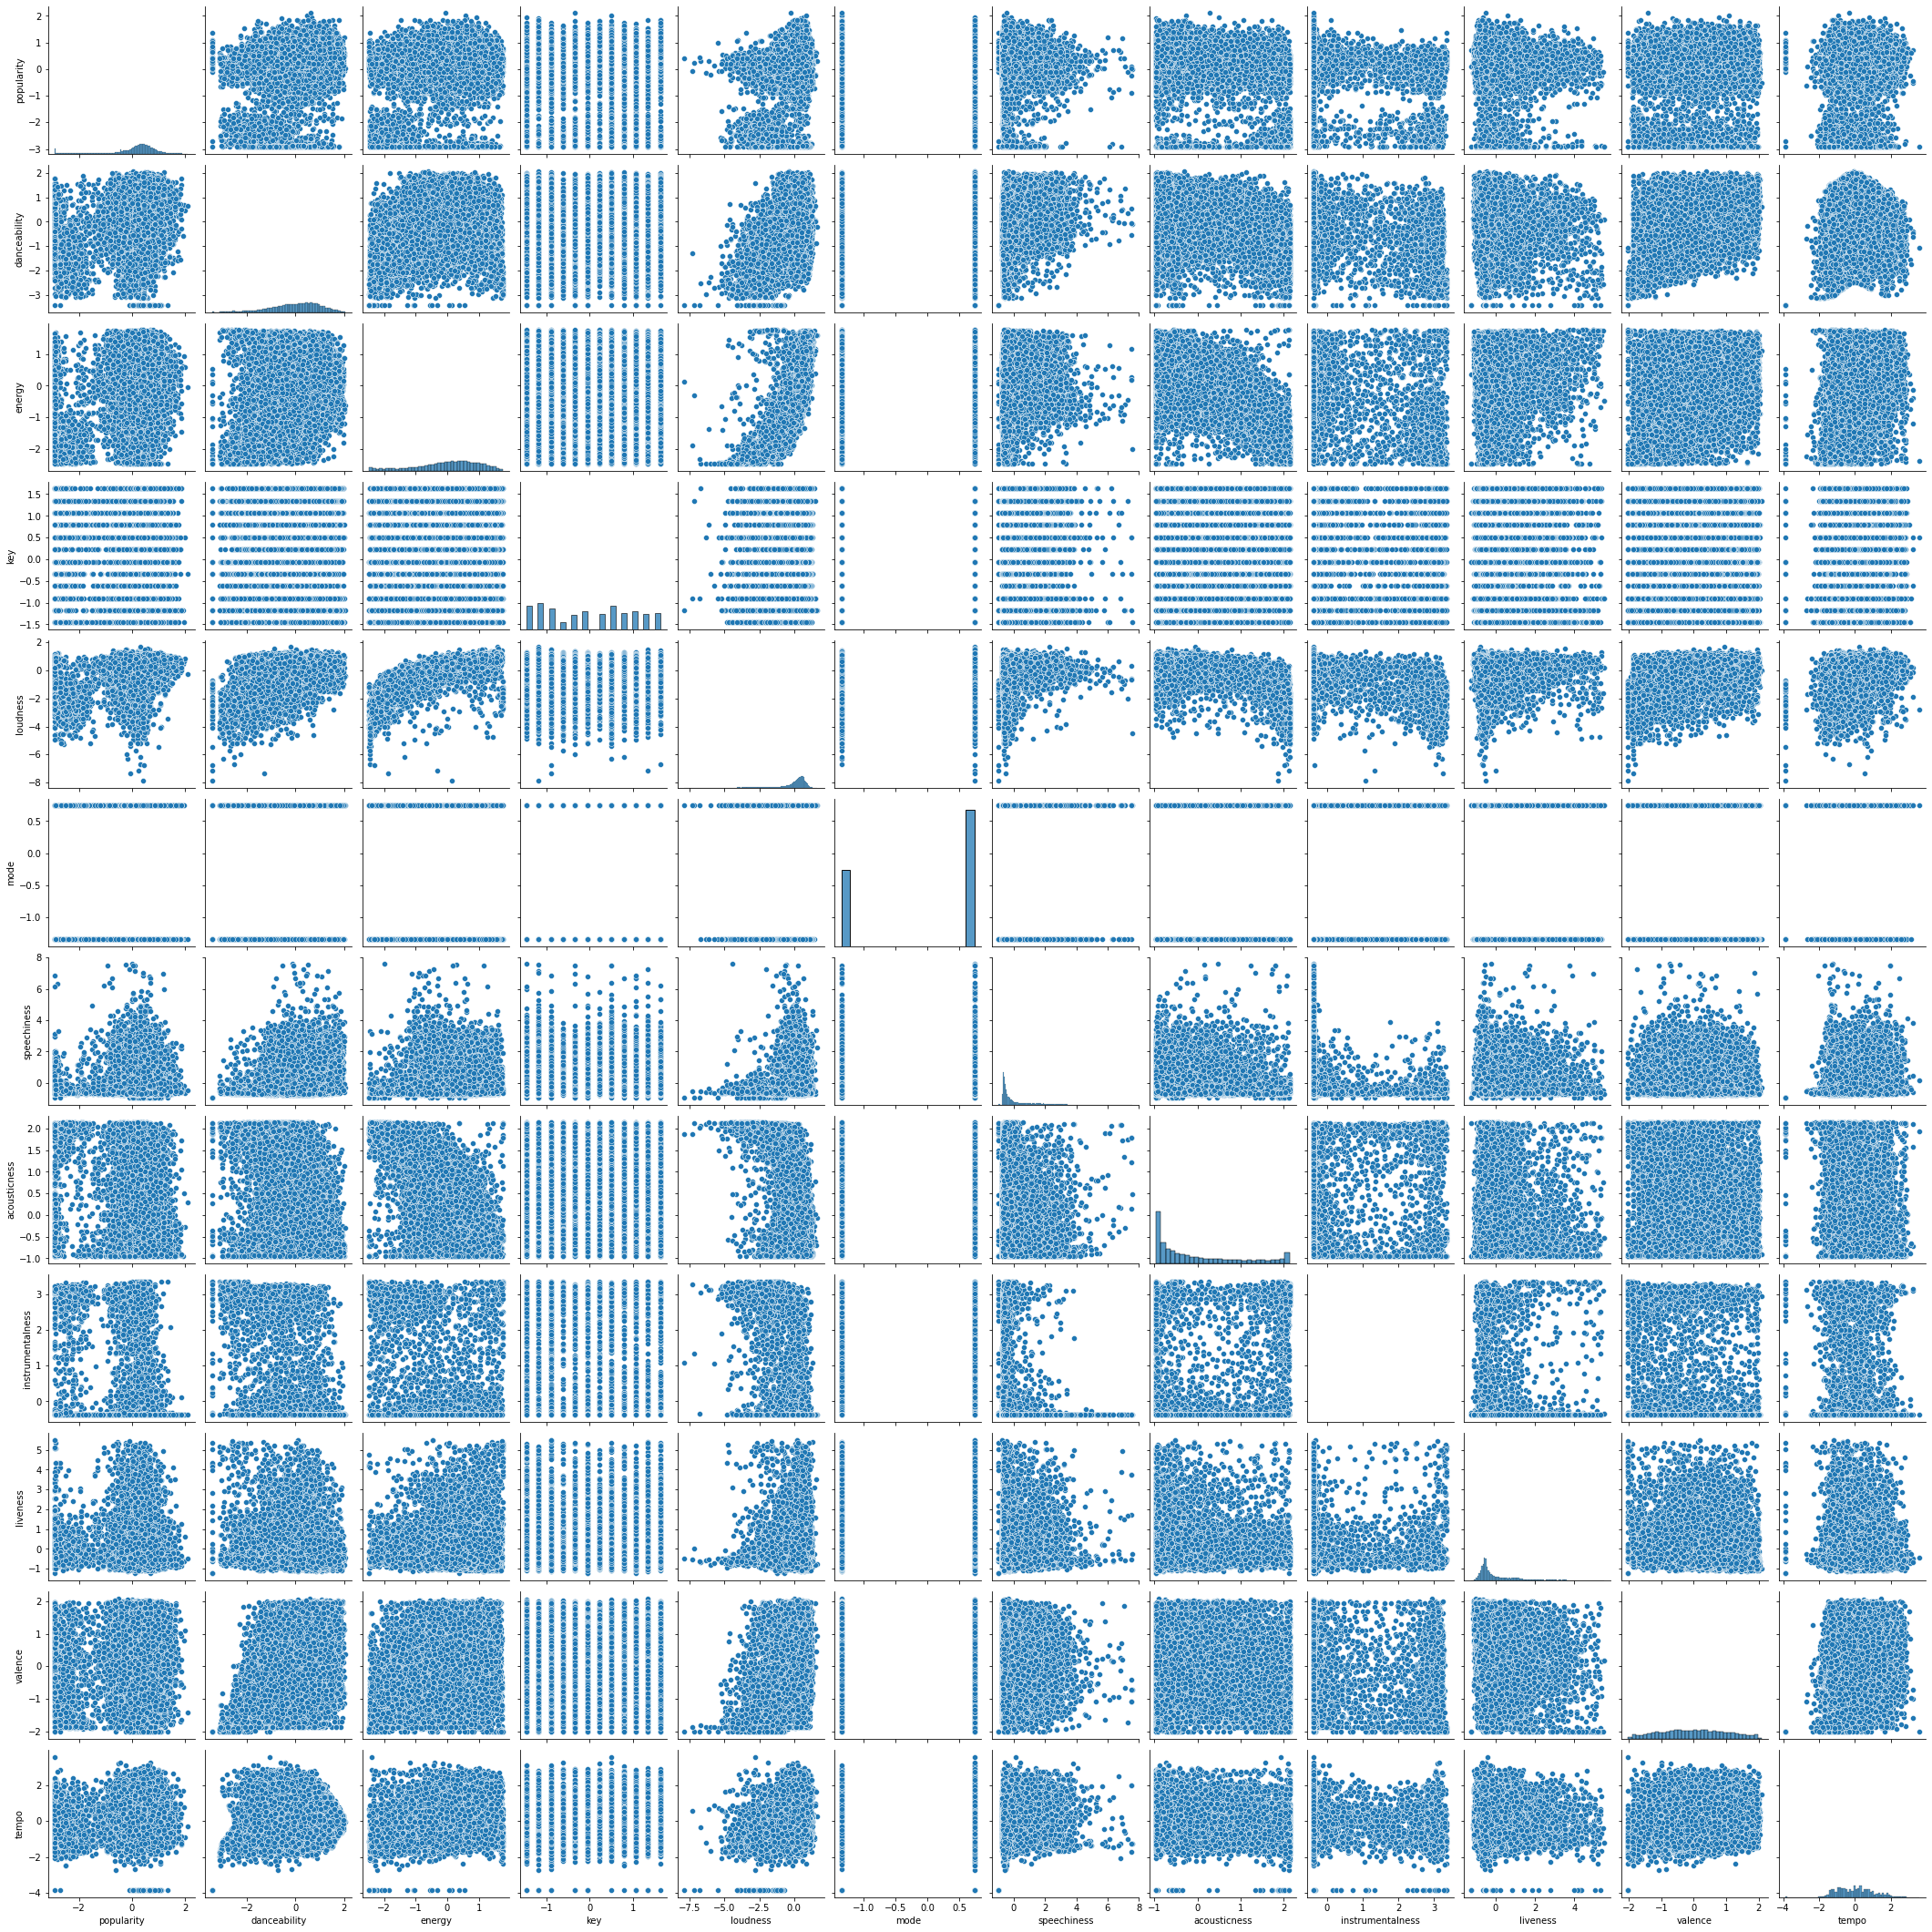

In [29]:
sns.pairplot(scaled_df)

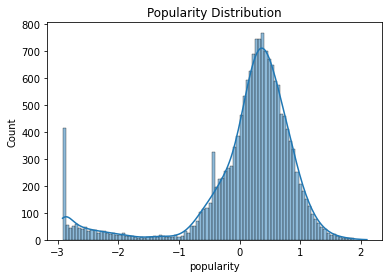

In [30]:
# Create a histogram of 'popularity'
sns.histplot(data=scaled_df, x='popularity', kde=True)
plt.title('Popularity Distribution')
plt.show()

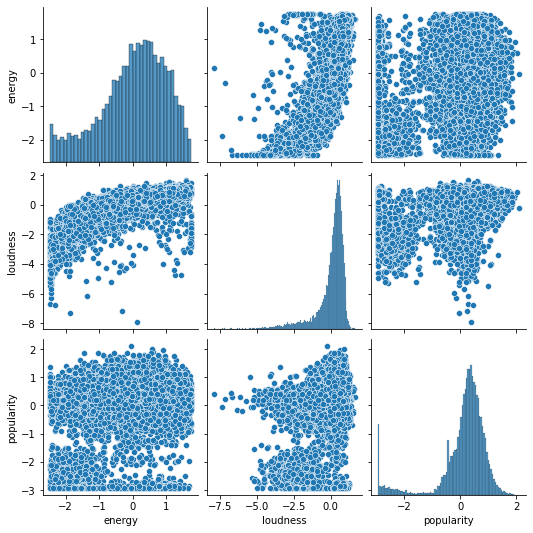

In [31]:
# Create a scatter plot matrix of 'energy', 'loudness', and 'popularity'
sns.pairplot(data=scaled_df[['energy', 'loudness', 'popularity']])
plt.show()

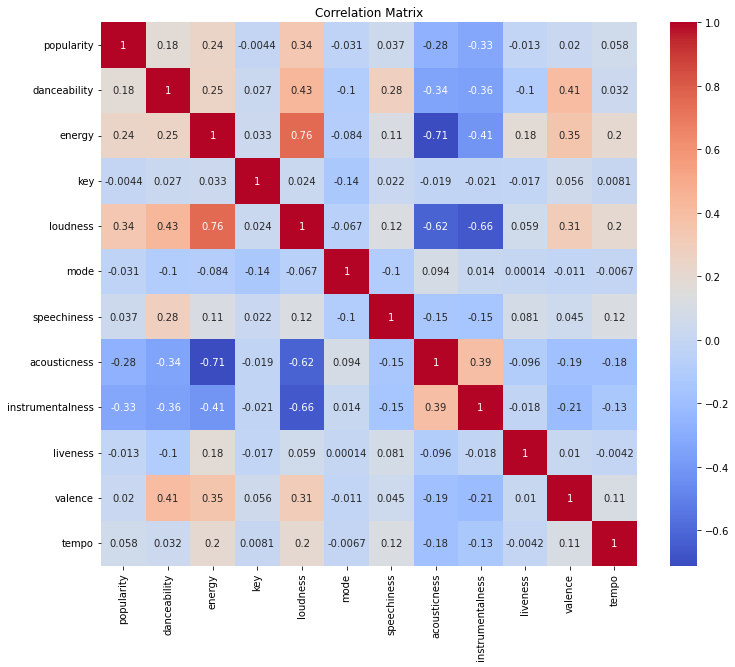

In [32]:
# Compute the correlation matrix
corr_matrix = scaled_df.corr()

# Plot the correlation matrix using Seaborn heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<AxesSubplot:xlabel='popularity', ylabel='Count'>

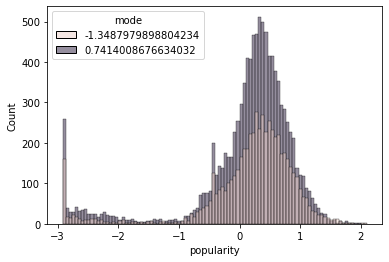

In [33]:
sns.histplot(data=scaled_df, x='popularity', hue='mode')

<AxesSubplot:xlabel='popularity', ylabel='tempo'>

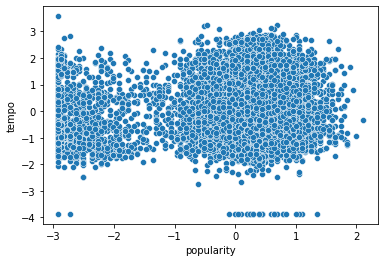

In [34]:
sns.scatterplot(data=scaled_df, x="popularity", y="tempo")

<AxesSubplot:xlabel='popularity', ylabel='danceability'>

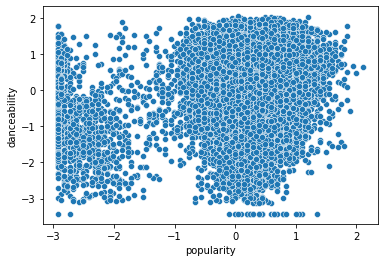

In [35]:
sns.scatterplot(data=scaled_df, x="popularity", y="danceability")

# Model Development:

Create a content-based filtering function that takes user preferences (popularity) and song features as input and outputs song recommendations.
Compute the similarity between the popularity and the songs' features in the dataset.
Recommend the top N most similar songs to the user.

In [36]:
scaled_df[scaled_df['name'] == 'I Kissed A Girl']

name  popularity  danceability    energy       key  loudness  \
3  I Kissed A Girl    0.495194      0.461408  0.742094 -0.053781  0.936118   

       mode  speechiness  acousticness  instrumentalness  liveness   valence  \
3  0.741401     -0.35477     -0.951928         -0.382734 -0.343019  0.842796   

      tempo  
3  0.329451

## Recommending Similar Songs with Correlation

In [37]:
# Data, DataFrame creation, and scaling code go here
scaled_features = scaled_df.drop('name', axis=1)
correlation_matrix = scaled_features.corr(method='pearson')

In [38]:
def get_similar_songs_corr(song_name, n=5):
    song_index = scaled_df[scaled_df['name'] == song_name].index[0]
    similarity_scores = list(enumerate(correlation_matrix.iloc[song_index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Get the top N similar songs (excluding the song itself)
    top_n_similar_songs = [scaled_df.iloc[i[0]]['name'] for i in similarity_scores[1:n+1]]

    return top_n_similar_songs

In [39]:
song_name = 'I Kissed A Girl'
recommended_songs = get_similar_songs_corr(song_name, n=3)
print(f"Top 3 similar songs to '{song_name}' are:")
for i, song in enumerate(recommended_songs, start=1):
    print(f"{i}. {song}")

Top 3 similar songs to 'I Kissed A Girl' are:
1. IV. Sweatpants
2. Swing, Swing
3. Brand New Man - with Luke Combs


## Recommending Similar Songs with Cosine Similarity

In [40]:
from sklearn.metrics.pairwise import cosine_similarity

In [41]:
song_features = scaled_df.drop('name', axis=1)
cosine_sim_matrix = cosine_similarity(song_features)

In [42]:
#cosine_sim_matrix

In [43]:
def get_similar_songs(song_name, n=5):
    song_index = scaled_df[scaled_df['name'] == song_name].index[0]
    similarity_scores = list(enumerate(cosine_sim_matrix[song_index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Get the top N similar songs (excluding the song itself)
    top_n_similar_songs = [scaled_df.iloc[i[0]]['name'] for i in similarity_scores[1:n+1]]

    return top_n_similar_songs

In [44]:
song_name = 'I Kissed A Girl'
recommended_songs = get_similar_songs(song_name, n=3)
print(f"Top 3 similar songs to '{song_name}' are:")
for i, song in enumerate(recommended_songs, start=1):
    print(f"{i}. {song}")

Top 3 similar songs to 'I Kissed A Girl' are:
1. Take A Hint
2. I Wanna Know (feat. Bea Miller)
3. Shout Out to My Ex


###### does PCA improve my recommendations?

In [45]:
from sklearn.decomposition import PCA

In [46]:
song_features = scaled_df.drop('name', axis=1)

# Determine the number of components to keep (you can experiment with different values)
n_components = 5

pca = PCA(n_components=n_components)
pca_song_features = pca.fit_transform(song_features)

In [47]:
cosine_sim_matrix = cosine_similarity(pca_song_features)

In [48]:
def get_similar_songs(song_name, n=5):
    song_index = scaled_df[scaled_df['name'] == song_name].index[0]
    similarity_scores = list(enumerate(cosine_sim_matrix[song_index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Get the top N similar songs (excluding the song itself)
    top_n_similar_songs = [scaled_df.iloc[i[0]]['name'] for i in similarity_scores[1:n+1]]

    return top_n_similar_songs

In [49]:
song_name = 'I Kissed A Girl'
recommended_songs = get_similar_songs(song_name, n=3)
print(f"Top 3 similar songs to '{song_name}' are:")
for i, song in enumerate(recommended_songs, start=1):
    print(f"{i}. {song}")

Top 3 similar songs to 'I Kissed A Girl' are:
1. Whore of Babylon
2. Who Shot Cupid?
3. My Way (feat. Monty)


##### What about a neural network like tensor flow?

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

In [51]:
#Use the DataFrame from the previous example and normalize the features:
song_features = scaled_df.drop('name', axis=1)

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(song_features)

In [52]:
#Build the autoencoder model:
input_dim = normalized_features.shape[1]
encoding_dim = 5

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(input_layer, decoder)

In [53]:
#Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(normalized_features, normalized_features, epochs=100, batch_size=2, shuffle=True)

Epoch 1/100
8136/8136 [==============================] - 8s 849us/step - loss: 0.0254
Epoch 2/100
8136/8136 [==============================] - 6s 722us/step - loss: 0.0111
Epoch 3/100
8136/8136 [==============================] - 6s 756us/step - loss: 0.0102
Epoch 4/100
8136/8136 [==============================] - 6s 727us/step - loss: 0.0099
Epoch 5/100
8136/8136 [==============================] - 6s 729us/step - loss: 0.0097
Epoch 6/100
8136/8136 [==============================] - 6s 755us/step - loss: 0.0096
Epoch 7/100
8136/8136 [==============================] - 6s 723us/step - loss: 0.0096
Epoch 8/100
8136/8136 [==============================] - 6s 735us/step - loss: 0.0095
Epoch 9/100
8136/8136 [==============================] - 6s 727us/step - loss: 0.0095
Epoch 10/100
8136/8136 [==============================] - 6s 726us/step - loss: 0.0094
Epoch 11/100
8136/8136 [==============================] - 6s 747us/step - loss: 0.0094
Epoch 12/100
8136/8136 [============================

8136/8136 [==============================] - 6s 766us/step - loss: 0.0086
Epoch 96/100
8136/8136 [==============================] - 6s 707us/step - loss: 0.0087
Epoch 97/100
8136/8136 [==============================] - 6s 714us/step - loss: 0.0086
Epoch 98/100
8136/8136 [==============================] - 6s 718us/step - loss: 0.0086
Epoch 99/100
8136/8136 [==============================] - 6s 709us/step - loss: 0.0086
Epoch 100/100
8136/8136 [==============================] - 6s 708us/step - loss: 0.0086


In [54]:
#Extract the lower-dimensional representations:
encoder_model = Model(input_layer, encoder)
encoded_features = encoder_model.predict(normalized_features)

509/509 [==============================] - 0s 613us/step


In [55]:
#Calculate cosine similarity between the lower-dimensional representations:
cosine_sim_matrix = cosine_similarity(encoded_features)

In [56]:
#get similar song rec.
song_name = 'I Kissed A Girl'
recommended_songs = get_similar_songs(song_name, n=3)
print(f"Top 3 similar songs to '{song_name}' are:")
for i, song in enumerate(recommended_songs, start=1):
    print(f"{i}. {song}")

Top 3 similar songs to 'I Kissed A Girl' are:
1. State of Unreality
2. Lonely
3. Tonight Tonight


# Conclusion

In this project, I developed a content-based music recommendation system that suggests songs to users based on their musical preferences and the features of the songs. I put a strong emphasis on data cleaning, preprocessing, and exploratory data analysis (EDA) to ensure that the input data for my recommendation system was reliable and meaningful.

The data cleaning process involved handling missing values by either dropping the rows with missing data or imputing the mean value of the respective column. I also removed irrelevant features, which helped to reduce the dimensionality of the dataset, and standardized the remaining features using the StandardScaler to bring them onto a common scale.

During the preprocessing stage, I addressed the issue of duplicated song entries by retaining only the instance with the highest popularity score. This step ensured that my dataset consisted of unique song entries, making it more suitable for generating recommendations.

EDA played a crucial role in understanding the underlying patterns and relationships within the data. However, I found that the EDA results were not as clear as I had hoped, with no distinct clusterings in the data. This outcome could be attributed to the complexity of musical features and their interactions, making it challenging to identify obvious patterns.

Despite the lack of clear clusterings, I explored different techniques for calculating similarity between songs and found that the best system for generating recommendations was a neural network using TensorFlow, which provided the most accurate and relevant song suggestions. However, it is essential to consider that TensorFlow requires more computational power, which could be an important factor when dealing with larger datasets.

The second-best method was cosine similarity, which performed reasonably well but did not show significant improvement when used with PCA. Cosine similarity requires less computational power than TensorFlow, making it a more suitable option when dealing with larger datasets than the one I used. The correlation-based recommendation system came in third place, offering less accurate recommendations compared to the other two methods.